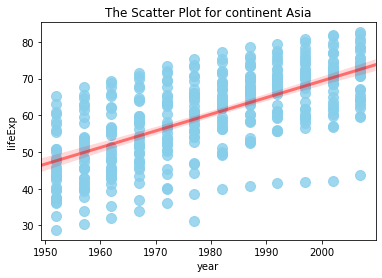

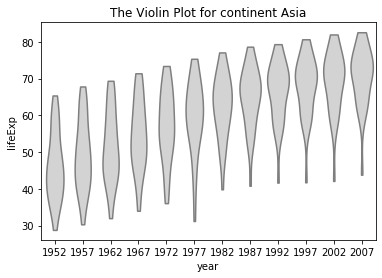

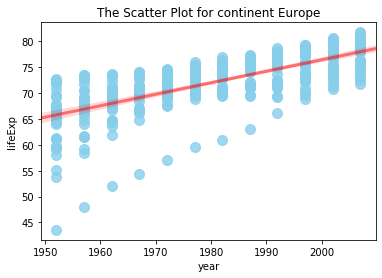

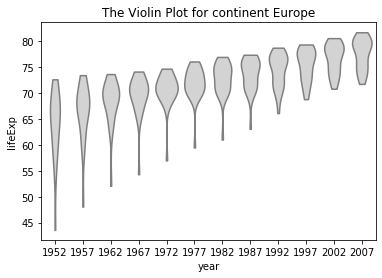

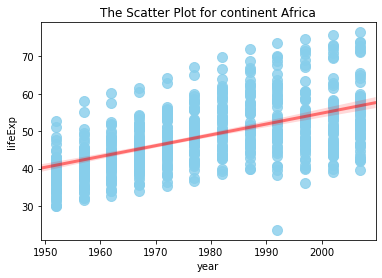

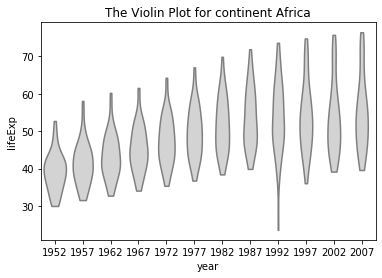

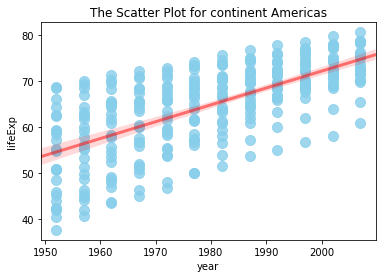

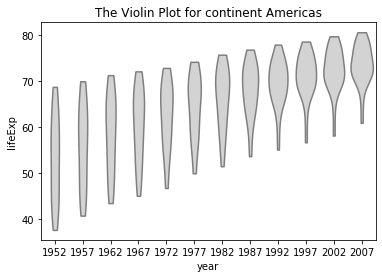

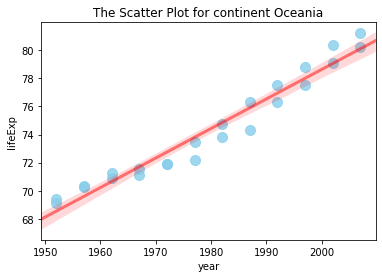

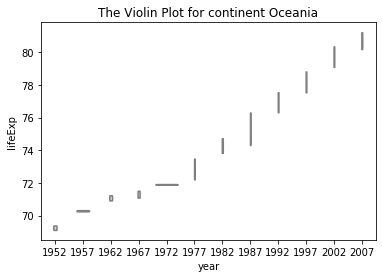

<Figure size 432x288 with 0 Axes>

In [80]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

##Exercise 1: scatter plot of life expectancy across time.

web=requests.get("https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv")
data=BeautifulSoup(web.content,'lxml')
tab=data.find_all("table")[0]
life_data=pd.read_html(str(tab))[0]
#data = pd.read_csv("https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv", sep='\t')

life_data
life_data.pop('Unnamed: 0')
continent=life_data['continent'].unique()
for con in continent:
    life_exp=life_data.loc[life_data["continent"]==con][['country','year','lifeExp']]
    plot=sns.regplot(data=life_exp,x='year',y='lifeExp',marker="o",color="skyblue", scatter_kws={'s':100}, line_kws={"color":"r","alpha":0.5,"lw":3})
    titl1="The Scatter Plot for continent "+con
    plt.title(titl1)
    plt.figure()

    # violin plot
    plot=sns.violinplot(x='year',y='lifeExp',data=life_exp,cut=0, color = 'lightgray', inner=None)
    #plot=sns.regplot(x='year',y='lifeExp',data=life_exp)
    #plot = sns.lmplot(x='year',y='lifeExp',data=life_exp)
    titl="The Violin Plot for continent "+con
    plt.title(titl)
    
    plt.figure()
    
    

For this exercise you will explore how life expectancy has changed over 50 years across the world, and how economic measures like gross domestic product (GDP) are related to it.




# Question1:

Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? 
Ans:
Yes, the life expectancy has an increasing trend across time.

Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)
Ans:
yes, the trend is linear.

****

Question 2: 
How would you describe the distribution of life expectancy across countries for individual years? 
Is it skewed, or not? Unimodal or not? Symmetric around it’s center?
Ans:
Asia:
Yes it is skewed to lower life expectancy in early years 1950s and 60s. And it gets skewed to higher life expectancy in later years 1980s to 2000s.
Unimodal means having single mode value in the distribution ( a value which comes max. time of occurances). But we see the width of the violins are defined by data points having similar or same value for lifeExp. The data is not unimodal.
We see the violin( data point distributions are not similar around the center) are skewed and does not look symmetric around the center.

Europe
Africa
Americas
Oceania

****

Question 3: 
Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? 
(do this without fitting the model yet. I am testing your intuition.)
Ans:
Yes, the null hypothesis will be rejected as through the scatter plot and even through the violin plot, it looks definitely that the life expectancy is inceasing with year

****

Question 4: 
What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)
Ans:
Residuals are defined as actual values minus the estimated values (estimated based on the hypothetical linear equation here).
As we have actual values spreading from higher to lower values of lifeExp and we can have a brief idea of the estimated value from the regression line. I believe residuals will also have a good range. Thus violin plot will look similar with a height and a width.


****

Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); 
do you think everything is okay?
Ans:
Yeah the violin plot looks like similar to what we see above. And everything looks okay.

****





[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


AttributeError: 'str' object has no attribute 'conjugate'

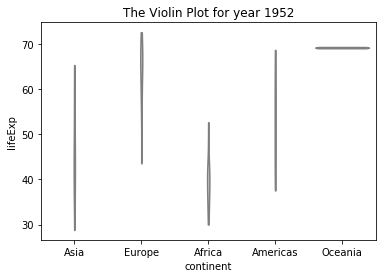

In [79]:
time=life_data['year'].unique()
print(time)
for tim in time:
    life_exp=life_data.loc[life_data['year']==tim][['country','continent','lifeExp']]
    plot=sns.violinplot(x='continent',y='lifeExp',data=life_exp,cut=0, color = 'lightgray', inner=None)
    titl="The Violin Plot for year "+str(tim)
    plt.title(titl)
    sns.residplot(x='continent',y='lifeExp',data=life_exp, lowess=True, color="g")
    plt.figure()